In [1]:
from sklearn.datasets import load_wine

dataset = load_wine() #load the wine dataset
X = dataset["data"] #assign features to X matrix
y = dataset["target"] # assign labels to Y vector
feature_names = dataset["feature_names"]
X.shape, y.shape

((178, 13), (178,))

In [2]:
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

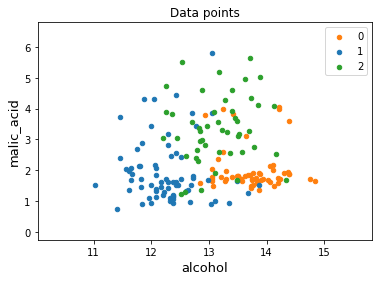

In [3]:
from matplotlib import pyplot as plt

# Calculate min, max and limits on dataset
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot wine dataset, encoding label with color
plt.figure()

color = ['tab:orange', 'tab:blue', 'tab:green']
for i in [0, 1, 2]:
    mask = y==i
    plt.scatter(X[mask, 0], X[mask, 1], c=color[i], s = 20, label = i)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Data points")
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)

plt.legend()

plt.savefig("Wine_distribution.pdf")

plt.show()


Select only features of itnterest: __alcohol__ and __malic acid__ features.
Performing such reduction it is possible to visually represent the 2D feature space. 

Now the dataset is divided in training, validation and test set. Model will be trained on training set, while
it will be evaluated on the validation set, on which hyperparameters tuning is performed.

In [4]:
# Split dataset without stratification too see how changes data distributino from train, test, validation set

from sklearn.model_selection import train_test_split

#shuffle = default True, since y array is ordered by category

X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], y, test_size = 0.3, shuffle = True) #test size = 30% of the total

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.285, shuffle = True) #0.285*0.7 = 0.2 = validation set size

In [5]:
#Print distribution respect to the label for train, test, validation sets withput stratification

from collections import Counter

c = Counter(y)

print("original")
for i in [0,1,2]:
    print(i, c[i]/len(y))

c = Counter(y_train)


print("train")
for i in [0,1,2]:
    print(i, c[i]/len(y_train))

c = Counter(y_test)

print("test")
for i in [0,1,2]:
    print(i, c[i]/len(y_test))
    
c = Counter(y_val)

print("validation")
for i in [0,1,2]:
    print(i, c[i]/len(y_val))

original
0 0.33146067415730335
1 0.398876404494382
2 0.2696629213483146
train
0 0.4090909090909091
1 0.3409090909090909
2 0.25
test
0 0.2777777777777778
1 0.4444444444444444
2 0.2777777777777778
validation
0 0.2222222222222222
1 0.4722222222222222
2 0.3055555555555556


The 3 resulting datasets have unbalanced data distribution respect to each other and to the unsplitted dataset.
This means we would train a model on a specific data distribution (training set), validate in a new one (validation set), for the model to perform on a third one (test set distribution).
This unbalancement could result in bad performances: we can use stratification to preserve original data distribution.

In [6]:
from sklearn.model_selection import train_test_split

#shuffle = default True, since y array is ordered by category

X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], y, test_size = 0.3, shuffle = True, 
                                                    stratify = y, random_state = 1000) #test size = 30% of the total

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.285, shuffle = True, 
                                                 stratify = y_train, random_state = 300) #0.285*0.7 = 0.2 = validation set size

In [7]:
# Print distribution of train, test, validation sets with stratification

c = Counter(y)

print("original")
for i in [0,1,2]:
    print(i, c[i]/len(y))

c = Counter(y_train)

print("train")
for i in [0,1,2]:
    print(i, c[i]/len(y_train))

c = Counter(y_test)

print("test")
for i in [0,1,2]:
    print(i, c[i]/len(y_test))
    
c = Counter(y_val)

print("validation")
for i in [0,1,2]:
    print(i, c[i]/len(y_val))

original
0 0.33146067415730335
1 0.398876404494382
2 0.2696629213483146
train
0 0.32954545454545453
1 0.4090909090909091
2 0.26136363636363635
test
0 0.3333333333333333
1 0.3888888888888889
2 0.2777777777777778
validation
0 0.3333333333333333
1 0.3888888888888889
2 0.2777777777777778



It is useful to have our data shuffled before being splitted, since the original label distribution is the following


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Next step is to import from scikit-learn KNeighborsClassifier, and build the KNN model on the training dataset.
The training and evaluation operation will be performed for K = [1, 3, 5, 7].

For the distance measure and weights parameters, I use default setting which provides euclidean distance (minkowski distance with p = 2) and uniform weights.


__K = 1__

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k = 1

clf = KNeighborsClassifier(k)
clf.fit(X_train, y_train)

#instantiate prediction vector for all K values explored
y_pred = np.zeros((4, y_val.shape[0]))

Make prediction on the evaluation sete with K = 1 classifier

In [10]:
y_pred[0] = clf.predict(X_val)

Scatterplot the training data along with the decision boundaries created by the model

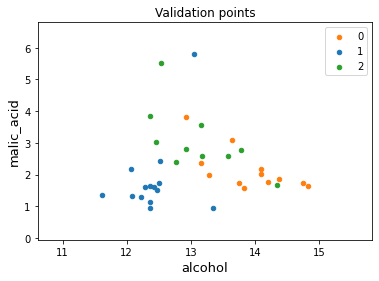

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#24BCD2'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

# Calculate min, max and limits on validation set
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1

# Plot validation set data with respective labels
plt.figure()
color = ['tab:orange', 'tab:blue', 'tab:green']
for i in [0, 1, 2]:
    mask = y_val==i
    plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], s = 20, label = i)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Validation points")
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.legend()

plt.show()

Plot now the decisijon boundaries given by the fitted classifier with K = 1

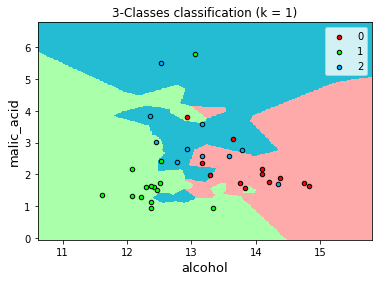

In [12]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # step size in the mesh

x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1

#define meshgrid to represent boundaries on the plot
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#make predictions over all points in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#Z.shape = xx.shape[0]*xx.shape[1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the validation points, with ground truth label y_val
color = ['#FF0000', '#00FF00', '#00AAFF']
for i in [0, 1, 2]:
    mask = y_val == i
    plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], cmap=cmap_bold,
                edgecolor='k', s=20, label = i)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.title("3-Classes classification (k = %i)" % (k))
plt.legend()

plt.show()

__K = 3__

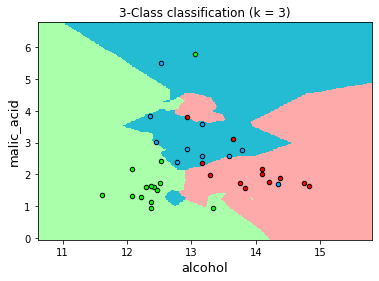

In [13]:
k = 3

clf = KNeighborsClassifier(k)

clf.fit(X_train, y_train)
y_pred[1] = clf.predict(X_val)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # step size in the mesh

x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
color = ['#FF0000', '#00FF00', '#00AAFF']
for i in [0, 1, 2]:
    mask = y_val == i
    plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], cmap=cmap_bold,
                edgecolor='k', s=20, label = i)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.title("3-Class classification (k = %i)" % (k))

plt.show()

__K = 5__

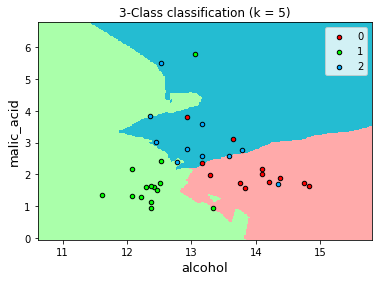

In [21]:
k = 5

clf = KNeighborsClassifier(k)

clf.fit(X_train, y_train)
y_pred[2] = clf.predict(X_val)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # step size in the mesh

x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
color = ['#FF0000', '#00FF00', '#00AAFF']
for i in [0, 1, 2]:
    mask = y_val == i
    plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], cmap=cmap_bold,
                edgecolor='k', s=20, label = i)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.title("3-Class classification (k = %i)" % (k))
plt.legend()

plt.show()

__K = 7__

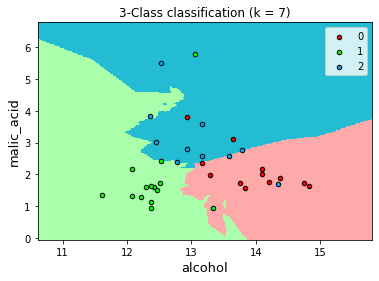

In [22]:
k = 7

clf = KNeighborsClassifier(k)

clf.fit(X_train, y_train)
y_pred[3] = clf.predict(X_val)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # step size in the mesh

x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
color = ['#FF0000', '#00FF00', '#00AAFF']
for i in [0, 1, 2]:
    mask = y_val == i
    plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], cmap=cmap_bold,
                edgecolor='k', s=20, label = i)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.title("3-Class classification (k = %i)" % (k))
plt.legend()

plt.show()

Compute accuracy for  K = [1, 3, 5, 7]

In [16]:
accuracy = np.zeros(4, dtype = float)

In [17]:
from sklearn.metrics import accuracy_score

for index in range(4):
    accuracy[index] = accuracy_score(y_val, y_pred[index]).round(decimals = 2)

accuracy

array([0.72, 0.86, 0.75, 0.78])

Plot accuracy scores on the validation set, for all k values tested.
This graph will be exploited to chooese best for the instantiated model

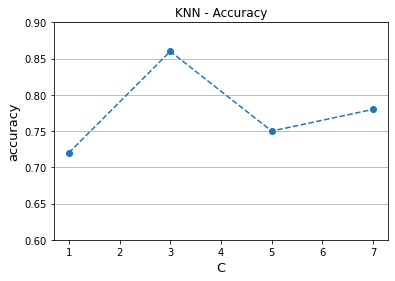

In [23]:
k_values = [1, 3, 5, 7]

plt.figure()
plt.plot(k_values, accuracy, linestyle='--', marker='o')
plt.xlabel("C", fontsize = 13)
plt.ylabel("accuracy", fontsize = 13)
plt.title("KNN - Accuracy")
plt.ylim(accuracy.min()-0.12, accuracy.max()+0.04)
plt.grid(True, axis = 'y')
plt.show()

According to accuracy metric best training in achieved with __K = 3__ 

Being hyperparameter tuning step concluded, the model can now perform on the test set.

In [19]:
clf = KNeighborsClassifier(3) #define a  model with best parameter: K = 3
clf.fit(X_train, y_train) 
y_test_pred = clf.predict(X_test) #predicttion on the test set

test_accuracy = accuracy_score(y_test, y_test_pred).round(decimals = 2) #prediction accuracy

test_accuracy

0.8

As one should expect the model decrease its performance on the test set of unseen data.
Of course this model was very naive, with the goal of being able to visualize decision boundaries: therefore the number of features has been limited to 2. A higher number of features would likely increase the performance of the model.
Also, we can do more in the tuning phase, using a cross validation which would give more reliable feedback on the model performance.


At last, it is possible to plot the confusion matrix for the predictions

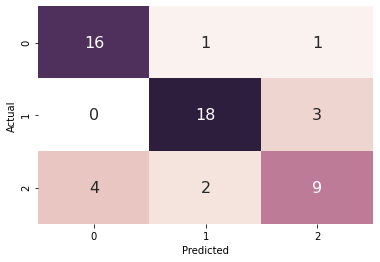

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd


cmap = sns.cubehelix_palette(light=1, as_cmap=True)

conf_mat = confusion_matrix(y_test, y_test_pred)

# Plot the result
label_names = ['0', '1', '2']
conf_mat_df = pd.DataFrame(conf_mat, index = label_names, columns = label_names)
conf_mat_df.index.name = 'Actual'
conf_mat_df.columns.name = 'Predicted'
sns.heatmap(conf_mat_df, annot=True, cmap= cmap, 
            annot_kws={"size": 16}, cbar=False)
plt.show()

From the above matrix, it is clear that worst accuracy is achieved for label 2. If we look at data distribution on our training set, 
we have the following partition per label:
    
__original__<br>
0, 0.33146067415730335 <br>
1, 0.398876404494382 <br>
2, 0.2696629213483146 <br>

One possible explaination for the worse performance is that for label 2 the set has the least number of training example, which
for sure has an impact on model construction and prediciton on unseen data. 